In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from yellowbrick.model_selection import LearningCurve
from sklearn.preprocessing import LabelEncoder

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn. discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from random import randint
from sklearn. metrics import f1_score
from sklearn. metrics import precision_recall_curve

In [ ]:
# поргружаем датасет
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# encoder - используется для того чтобы перевести данные из текста в число

encoder = LabelEncoder()
columns = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]
for i in columns:
    df[i] = encoder.fit_transform(df[i])

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
# Делим датасет на тестовую и тренировночные выборки с соотношением 80 к 20 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop("HeartDisease", axis=1), df["HeartDisease"], random_state=42, test_size=0.2)

Постройте следующие модели классификации:


1. случайное предсказание (подбрасывание кубика)

2. логистическая регрессия (LogisticRegression);

3. метод опорных векторов с линейным ядром (SVC(kernel='linear'));

4. метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)

5. метод k ближайших соседей (KNeighborsClassifier с двумя классами)


In [ ]:
mined_data = []

In [ ]:
# случайное предсказание (подбрасывание кубика)
precision = round(precision_score(y_test,[randint(0, 1) for i in range(len(x_test))]),3)
recall = round(recall_score(y_test,[randint(0, 1) for i in range(len(x_test))]),3)
print(f"Для случайного предсказания: accuracy: {round((accuracy_score(y_test,[randint(0, 1) for i in range(len(x_test))])),3)},\
      precision: {precision}, recall: {recall} "+'\n' )
print('f1-score: ', round((2*precision*recall)/(precision+recall),3))
mined_data.append(round((2*precision*recall)/(precision+recall),3))
mined_data

Для случайного предсказания: accuracy: 0.565,      precision: 0.539, recall: 0.439 

f1-score:  0.484


[0.484]

In [ ]:
# логистическая регрессия (LogisticRegression);
model = LogisticRegression().fit(x_train,y_train)
precision = round(precision_score(y_test,model.predict(x_test),average='macro'),3)
recall = round(recall_score(y_test,model.predict(x_test),average='macro'),3)
print(f"Для Логистической регрессии: accuracy: {round(accuracy_score(y_test,model.predict(x_test)),3)},\
      precision: {precision}, recall: {recall} "+'\n' )
print('f1-score: ', round((2*precision*recall)/(precision+recall),3))

mined_data.append(round((2*precision*recall)/(precision+recall),3))
mined_data

Для Логистической регрессии: accuracy: 0.842,      precision: 0.839, recall: 0.846 

f1-score:  0.842


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.484, 0.842]

In [ ]:
# метод опорных векторов с линейным ядром (SVC(kernel='linear'));
model = svm.SVC(kernel='linear').fit(x_train,y_train)
precision = round(precision_score(y_test,model.predict(x_test),average='macro'),3)
recall = round(recall_score(y_test,model.predict(x_test),average='macro'),3)
print(f"Для метода опорных векторов с линейным ядром:  accuracy: {round(accuracy_score(y_test,model.predict(x_test)),3)},\
      precision: {precision}, recall: {recall} "+'\n' )
print('f1-score: ', round((2*precision*recall)/(precision+recall),3))

mined_data.append(round((2*precision*recall)/(precision+recall),3))
mined_data

Для метода опорных векторов с линейным ядром:  accuracy: 0.837,      precision: 0.834, recall: 0.842 

f1-score:  0.838


[0.484, 0.842, 0.838]

In [ ]:
# метод линейного дискриминантного анализа (LinearDiscriminantAnalysis)
model = LinearDiscriminantAnalysis().fit(x_train,y_train)
precision = round(precision_score(y_test,model.predict(x_test),average='macro'),3)
recall = round(recall_score(y_test,model.predict(x_test),average='macro'),3)
print(f"Для метода линейного дискриминантного анализа:  accuracy: {round(accuracy_score(y_test,model.predict(x_test)),3)},\
      precision: {precision}, recall: {recall} "+'\n' )
print('f1-score: ', round((2*precision*recall)/(precision+recall),3))

mined_data.append(round((2*precision*recall)/(precision+recall),3))
mined_data

Для метода линейного дискриминантного анализа:  accuracy: 0.837,      precision: 0.834, recall: 0.842 

f1-score:  0.838


[0.484, 0.842, 0.838, 0.838]

In [ ]:
# метод k ближайших соседей (KNeighborsClassifier с двумя классами)
model = KNeighborsClassifier().fit(x_train,y_train)
precision = round(precision_score(y_test,model.predict(x_test),average='macro'),3)
recall = round(recall_score(y_test,model.predict(x_test),average='macro'),3)
print(f"Для метода k ближайших соседей:  accuracy: {round(accuracy_score(y_test,model.predict(x_test)),3)},\
      precision: {precision}, recall: {recall} "+'\n' )
print('f1-score: ', round((2*precision*recall)/(precision+recall),3))

mined_data.append(round((2*precision*recall)/(precision+recall),3))
mined_data

Для метода k ближайших соседей:  accuracy: 0.701,      precision: 0.698, recall: 0.703 

f1-score:  0.7


[0.484, 0.842, 0.838, 0.838, 0.7]

In [ ]:
# метод дерева решений
model = DecisionTreeClassifier().fit(x_train,y_train)
precision = round(precision_score(y_test,model.predict(x_test),average='macro'),3)
recall = round(recall_score(y_test,model.predict(x_test),average='macro'),3)
print(f"Для метода случайного леса:  accuracy: {round(accuracy_score(y_test,model.predict(x_test)),3)},\
      precision: {precision}, recall: {recall} "+'\n' )
print('f1-score: ', round((2*precision*recall)/(precision+recall),3))

mined_data.append(round((2*precision*recall)/(precision+recall),3))
mined_data

Для метода случайного леса:  accuracy: 0.815,      precision: 0.812, recall: 0.819 

f1-score:  0.815


[0.484, 0.842, 0.838, 0.838, 0.7, 0.815]

Задания 3 и 5) 

Сделайте вывод о применимости каждой модели на основе метрики F1-score (чем выше её значение, тем модель эффективнее).

In [ ]:
pd.DataFrame(mined_data, index=["Кубик","Лог.регрес", "SVC" , "LinearDisc" , "Kneigh","DesTree"], columns=["Значения f1"])

,Значения f1
Кубик,0.484
Лог.регрес,0.842
SVC,0.838
LinearDisc,0.838
Kneigh,0.700
DesTree,0.815


Вывод: самы лучший результат показал методы **Логрегрессии, SVC и LinearDisc**

Самый плохой **Кубик**

Задание 4) 

На основе метрики **accuracy** сделайте вывод о недообученности-переобученности модели логистической регрессии. Для этого сделайте предсказание на тренировочном датасете и посчитайте **accuracy** на нём, затем на тестовом датасете и тоже посчитайте **accuracy**. Сравните эти значения, они должны быть примерно одинаковыми. Если точность на обучающей выборке оказывается сильно выше - это означает, что модель переобучилась.

In [ ]:
model = LogisticRegression().fit(x_train,y_train)
print(f"Для train: accuracy: {round(accuracy_score(y_train,model.predict(x_train)),3)} ")
print(f"Для test: accuracy: {round(accuracy_score(y_test,model.predict(x_test)),3)} ")

Для train: accuracy: 0.858 
Для test: accuracy: 0.842 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

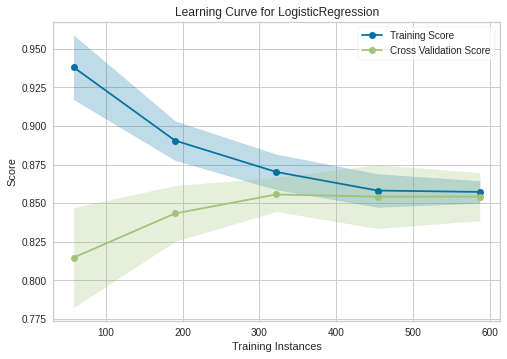

In [ ]:
from yellowbrick.model_selection import LearningCurve
learncurve = LearningCurve(model).fit(x_train, y_train)
learncurve.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: ROC AUC=0.902
LDA: ROC AUC=0.901
SVC: ROC AUC=0.898
KNeighbors: ROC AUC=0.731
DTC: ROC AUC=0.794


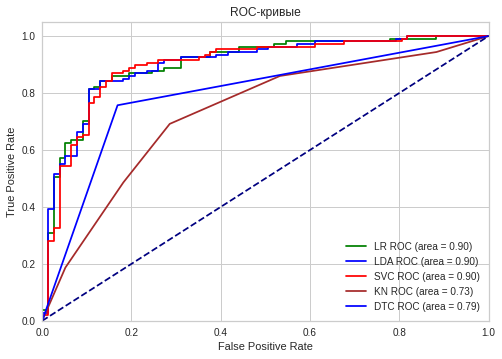

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

trainX, testX, trainy, testy = x_train, x_test, y_train, y_test

#--------------------------------------------------------------------
# обучаем модель
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# получаем предказания
lr_probs = model.predict_proba(testX)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(testy, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(testy, lr_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='green',
         label='LR ROC (area = %0.2f)' % roc_auc)
#--------------------------------------------------------------------



# обучаем модель
model = LinearDiscriminantAnalysis()
model.fit(trainX, trainy)
# получаем предказания
lr_probs = model.predict_proba(testX)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(testy, lr_probs)
print('LDA: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(testy, lr_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue',
         label='LDA ROC (area = %0.2f)' % roc_auc)
#--------------------------------------------------------------------


# обучаем модель
model = svm.SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# получаем предказания
lr_probs = model.predict_proba(testX)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(testy, lr_probs)
print('SVC: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(testy, lr_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='red',
         label='SVC ROC (area = %0.2f)' % roc_auc)
#--------------------------------------------------------------------



# обучаем модель
model = KNeighborsClassifier()
model.fit(trainX, trainy)
# получаем предказания
lr_probs = model.predict_proba(testX)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(testy, lr_probs)
print('KNeighbors: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(testy, lr_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='brown',
         label='KN ROC (area = %0.2f)' % roc_auc)
#--------------------------------------------------------------------
# обучаем модель
model = DecisionTreeClassifier()
model.fit(trainX, trainy)
# получаем предказания
lr_probs = model.predict_proba(testX)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(testy, lr_probs)
print('DTC: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(testy, lr_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue',
         label='DTC ROC (area = %0.2f)' % roc_auc)

#--------------------------------------------------------------------

# строим график

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc="lower right")
plt.show()


**ROC-кривая** показывает зависимость количества верно классифицированных положительных примеров от количества неверно классифицированных отрицательных примеров. В терминологии ROC-анализа первые называются истинно положительным, вторые — ложно отрицательным множеством.

Площадь под **ROC-кривой AUC** (Area Under Curve) является агрегированной характеристикой качества классификации, не зависящей от соотношения цен ошибок.


Чем **больше значение AUC**, **тем «лучше»** модель классификации. Данный показатель часто используется для сравнительного анализа нескольких моделей классификации.

Precision : Правильные положительные прогнозы относительно общего количества положительных прогнозов.

Точность = истинные положительные результаты / (истинные положительные результаты + ложные положительные результаты)